In [6]:
from transformers import pipeline
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = pipeline(task="image-to-image", model="caidas/swin2SR-lightweight-x2-64", device=device)

2024-05-31 15:23:29.492651: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-31 15:23:29.540804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 15:23:30.240681: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from PIL import Image
import requests

image = Image.open("./Domenico_Fetti_David.jpg")
#image = Image.open(requests.get(url, stream=True).raw)

print(image.size)

(732, 900)


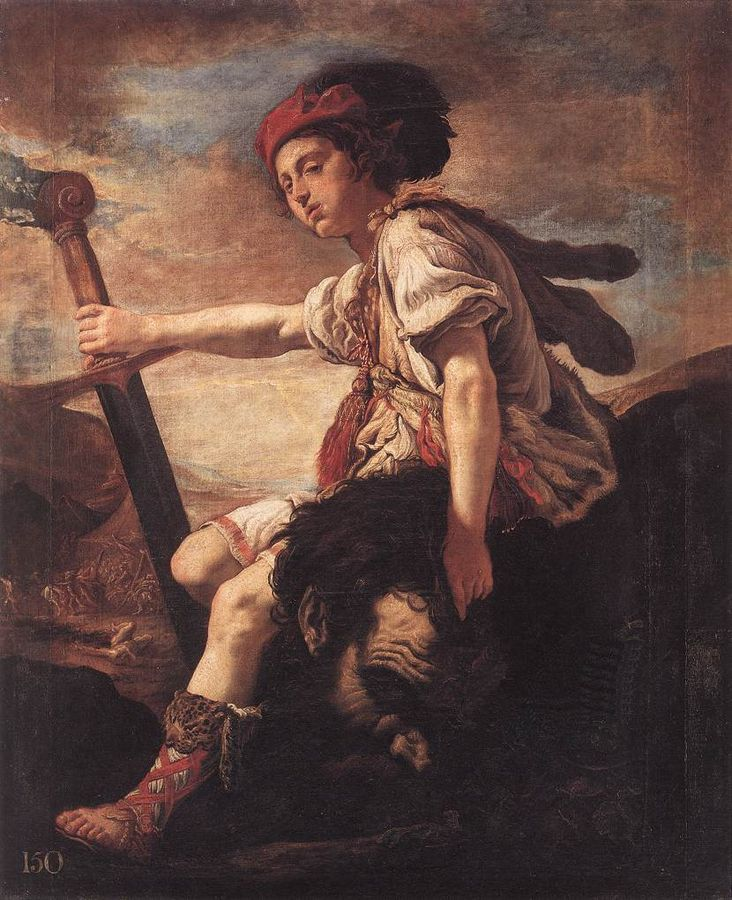

In [4]:
image

In [7]:
upscaled = pipe(image)
print(upscaled.size)

(1472, 1808)


In [9]:
from transformers import Swin2SRForImageSuperResolution, Swin2SRImageProcessor 

model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-lightweight-x2-64").to(device)
processor = Swin2SRImageProcessor("caidas/swin2SR-lightweight-x2-64")

In [10]:
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

pixel_values = pixel_values.to(device)

torch.Size([1, 3, 904, 736])


In [11]:
with torch.no_grad():
  outputs = model(pixel_values)

In [12]:
outputs.reconstruction.data.shape

torch.Size([1, 3, 1808, 1472])

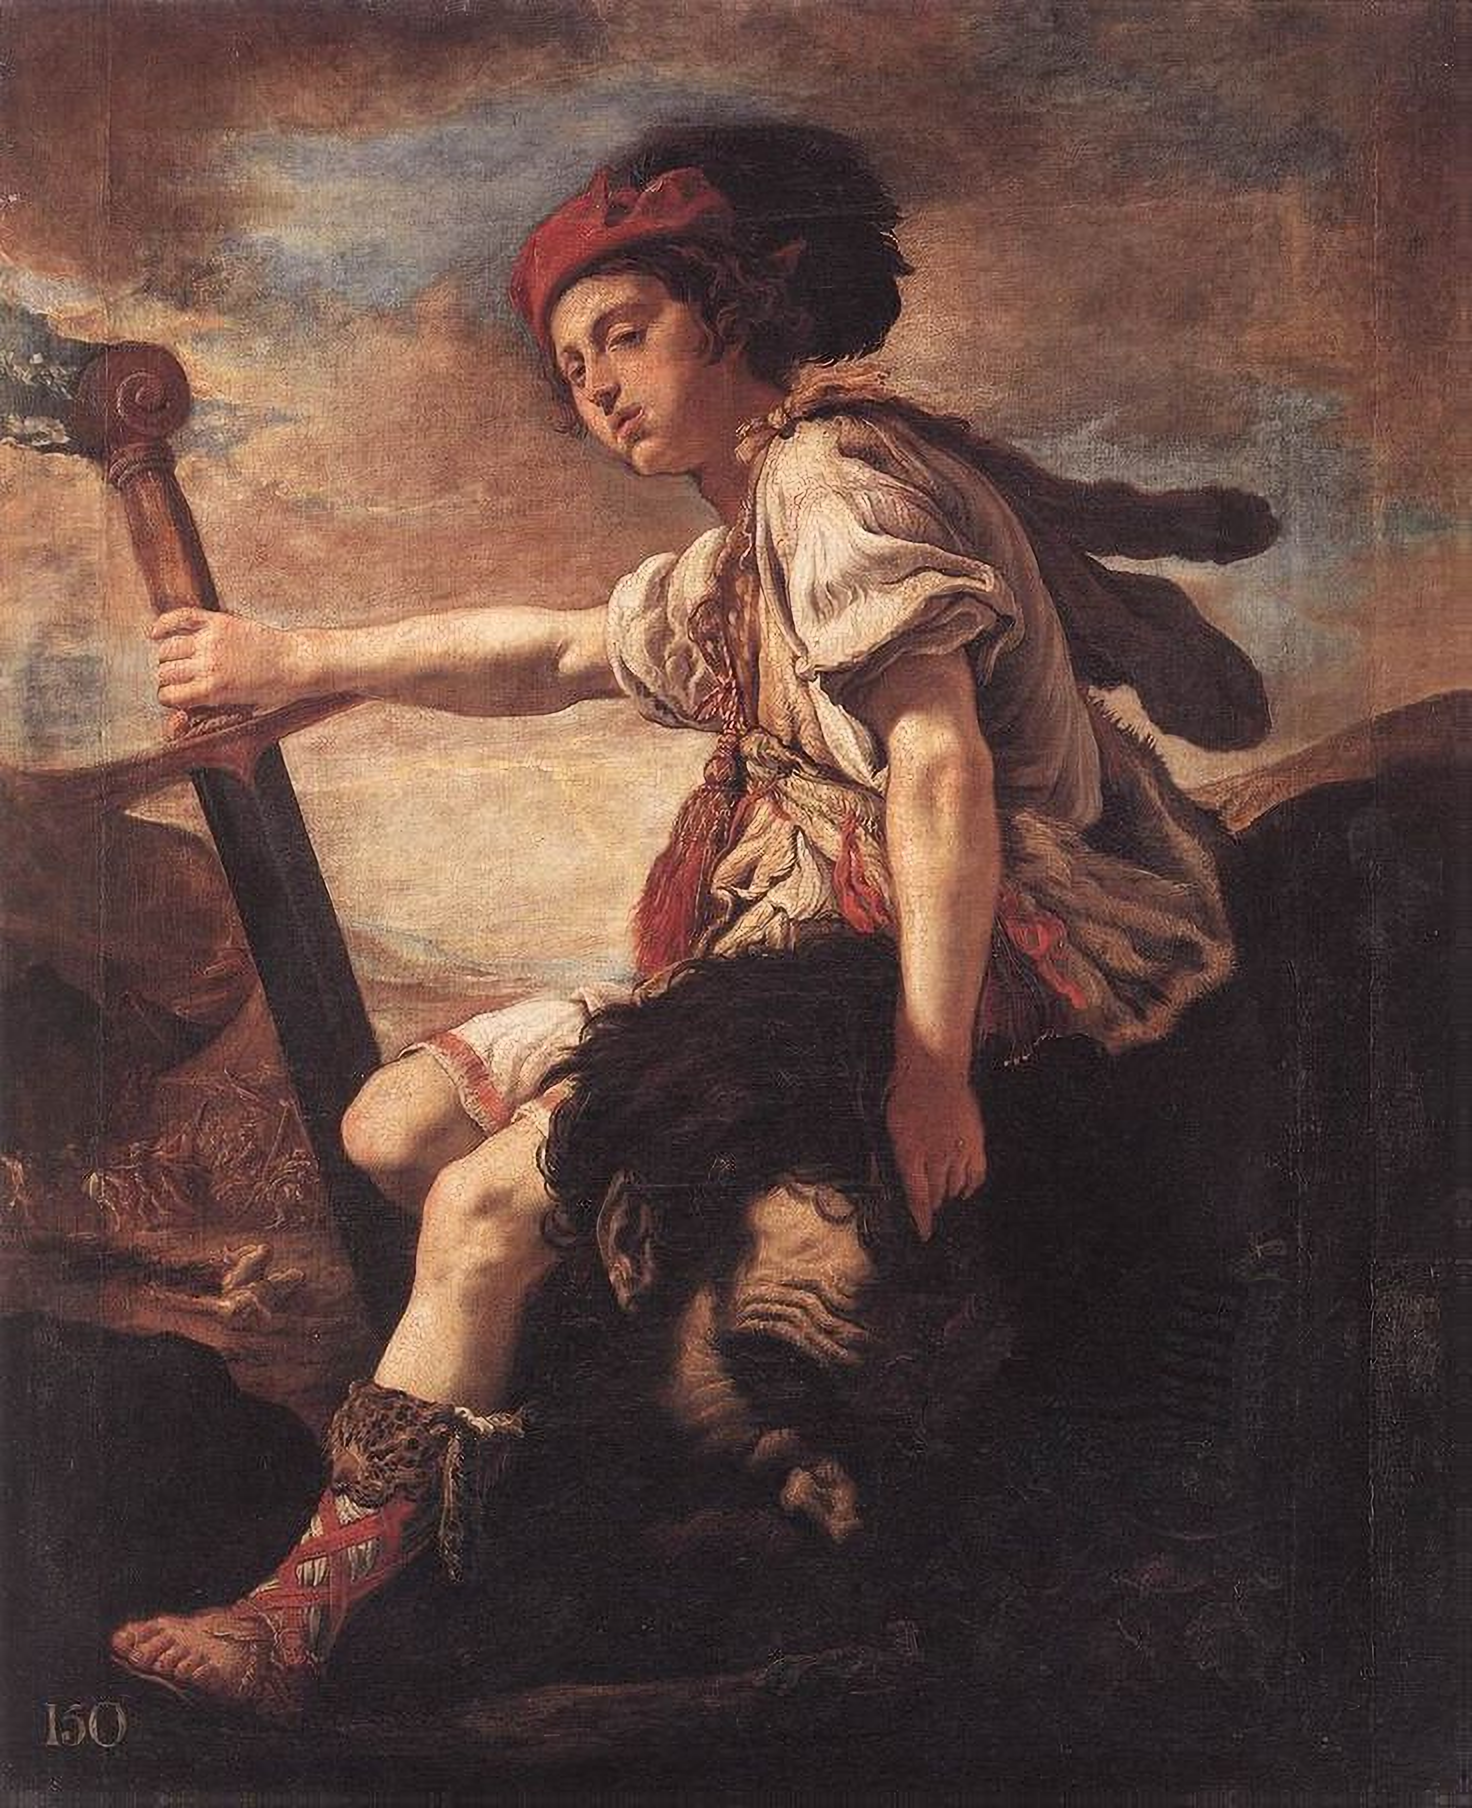

In [13]:
import numpy as np

# squeeze, take to CPU and clip the values
output = outputs.reconstruction.data.squeeze().cpu().clamp_(0, 1).numpy()
# rearrange the axes
output = np.moveaxis(output, source=0, destination=-1)
# bring values back to pixel values range
output = (output * 255.0).round().astype(np.uint8)
Image.fromarray(output)